In [ ]:
import pandas as pd
import numpy as np

#ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pltexp


from sklearn.model_selection import(
    train_test_split,# used to split the data into training and testing
    RandomizedSearchCV,# used for tuning the models parameters
    cross_val_score,
)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


<font size='5'> **Data Description :** </font>
- **Time :** in hours, date, days of the week, and counts for each vehicle type
- **Date :**
- **Day of the week :** .
- **CarCount :** count of cars
- **BikeCount :** count of cars
- **BusCount :** count of cars
- **TruckCount :** count of cars
- **Total :** represents the total count of all vehicle types detected within a 15-minute duration.

- **Traffic Situation :** categorized into four classes: 1-Heavy, 2-High, 3-Normal, and 4-Low.



#### Reading Data

In [ ]:
data=pd.read_csv("/content/Traffic dataset.csv")

In [ ]:
#to display all columns
data.head(20)

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal
5,1:15:00 AM,10,Tuesday,44,0,5,4,53,low
6,1:30:00 AM,10,Tuesday,37,0,1,4,42,low
7,1:45:00 AM,10,Tuesday,42,4,4,5,55,low
8,2:00:00 AM,10,Tuesday,51,0,9,7,67,low
9,2:15:00 AM,10,Tuesday,34,0,4,7,45,low


#### concluded that **Time** , **Day of the week** , **Traffic Situation** needed to be Encoded

In [ ]:
#know the number of rows and columns
data.shape

(2976, 9)

In [ ]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [ ]:
#show the statistics of data
data.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


In [ ]:
##checking the null values in each column to deal with it

In [ ]:
data.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [ ]:
# we don't have any dublicated rows

In [ ]:
###number of unique values in each column
#list of all the numeric columns
num = data.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = data.select_dtypes('object').columns.to_list()

for column in num:
    unique_categories_count = data[column].nunique()
    print(f'Unique categories in {column}: {unique_categories_count}')

Unique categories in Date: 31
Unique categories in CarCount: 172
Unique categories in BikeCount: 71
Unique categories in BusCount: 51
Unique categories in TruckCount: 41
Unique categories in Total: 239


In [ ]:
#checking the duplicated rows in our dataset to deal with it

In [ ]:
sum(data.duplicated())

0

In [ ]:
# we don't have any dublicated rows

<Axes: >

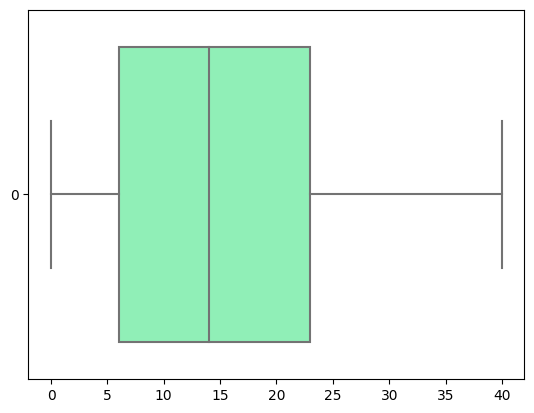

In [ ]:
#show the boxplot for each column to view outliers and dealing with it
sns.boxplot(data = data['TruckCount'],palette='rainbow',orient = 'h')

<Axes: >

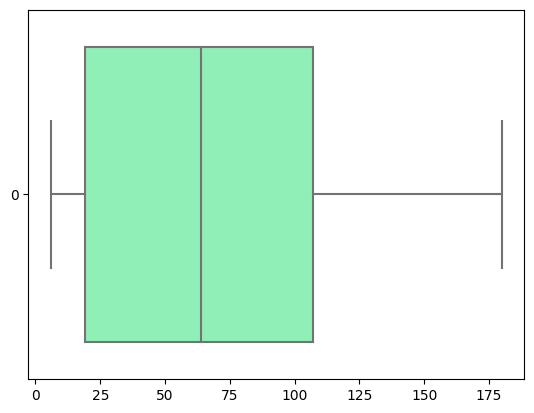

In [ ]:
sns.boxplot(data = data['CarCount'],palette='rainbow',orient = 'h')

<Axes: >

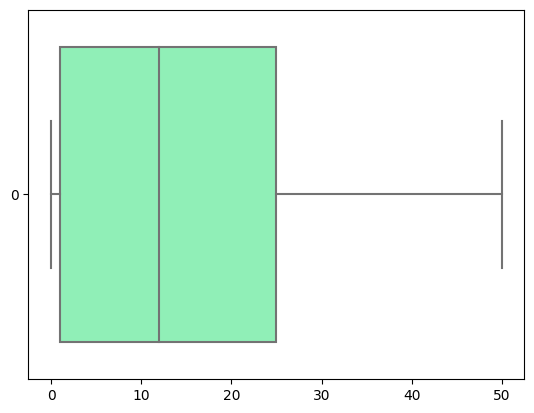

In [ ]:
sns.boxplot(data = data['BusCount'],palette='rainbow',orient = 'h')

<Axes: >

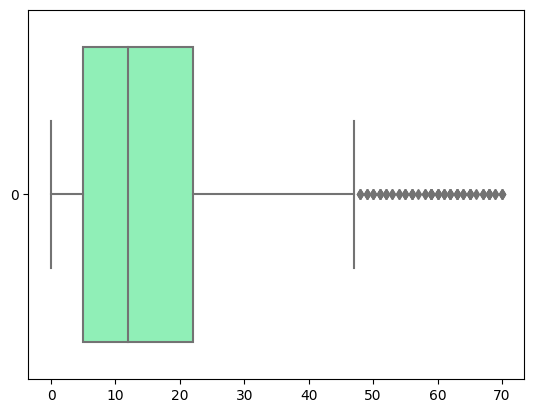

In [ ]:
sns.boxplot(data = data['BikeCount'],palette='rainbow',orient = 'h')

In [ ]:
## we have outliers on 'BikeCount' column we should handle it

In [ ]:
# summarizing statistical information for vehicle count columns in a dataset.


# List of columns to analyze
meanscols = ["CarCount", "BikeCount", "BusCount", "TruckCount"]

# Iterate over each column
for mean in meanscols:

    # Print the current column name
    print(mean)

    # Calculate and print quartiles (Q1, Median, Q3)
    print(f"Q1, Median, Q3: {np.quantile(data[mean], [0.25, 0.5, 0.75])}")

    # Print maximum and minimum values
    print(f"Max and Min: {data[mean].max()} and {data[mean].min()}")

    # Print total number of recorded vehicles where count > 0
    print(f"Total number of recorded vehicles > 0: {data[mean].loc[data[mean] > 0].sum()}")

     # Print total number of counts = 0
    print(f"Total number of counts = 0: {data[mean].loc[data[mean] == 0].count()}")
    print("\n")

CarCount
Q1, Median, Q3: [ 19.  64. 107.]
Max and Min: 180 and 6
Total number of recorded vehicles > 0: 204441
Total number of counts = 0: 0


BikeCount
Q1, Median, Q3: [ 5. 12. 22.]
Max and Min: 70 and 0
Total number of recorded vehicles > 0: 44394
Total number of counts = 0: 145


BusCount
Q1, Median, Q3: [ 1. 12. 25.]
Max and Min: 50 and 0
Total number of recorded vehicles > 0: 45472
Total number of counts = 0: 437


TruckCount
Q1, Median, Q3: [ 6. 14. 23.]
Max and Min: 40 and 0
Total number of recorded vehicles > 0: 45607
Total number of counts = 0: 119




In [ ]:
# Define the order of days of the week
days_order = ["Saturday", "Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

# Convert the "Day of the week" column to a categorical variable with the specified order
data["Day of the week"] = pd.Categorical(data["Day of the week"], categories=days_order, ordered=True)

# Sort the DataFrame based on the order of days of the week
data = data.sort_values(by="Day of the week")

# Group by "Day of the week" and calculate the sum of vehicle counts for each day
summary = data.groupby("Day of the week")[["CarCount", "BikeCount", "BusCount", "TruckCount"]].sum().reset_index()

# 'summary' now contains the total counts of vehicle types for each day of the week

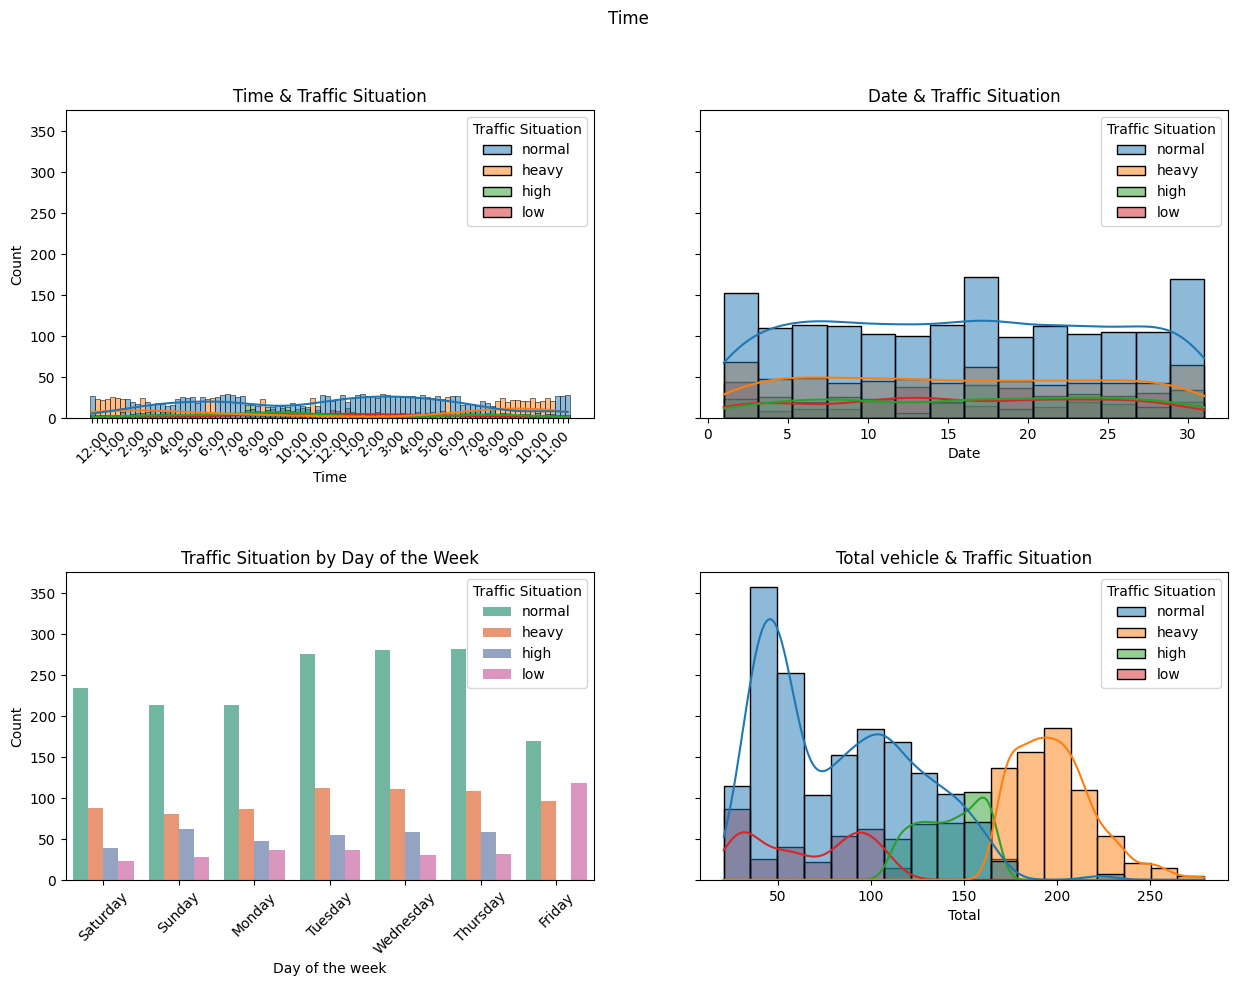

In [ ]:
####  time visualiztion
sharp_hours = ['12:00','','','','1:00','','','','2:00','','','','3:00','','','','4:00','','','','5:00','','','','6:00','','','','7:00','','','','8:00','','','','9:00','','','','10:00','','','','11:00' ,'','','', '12:00','','','','1:00','','','' ,'2:00','','','','3:00','','','','4:00','','','','5:00','','','','6:00','','','','7:00','','','','8:00','','','','9:00','','','','10:00','','','','11:00','','','','12:00','','','']
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
fig.suptitle('Time')

sns.histplot(data, x='Time', hue='Traffic Situation', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Time & Traffic Situation')
axes[0, 0].set_xticklabels(sharp_hours, rotation=45)

sns.histplot(data, x='Date', hue='Traffic Situation', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Date & Traffic Situation')

sns.countplot(data=data, x="Day of the week", hue="Traffic Situation", palette="Set2", ax=axes[1, 0])
axes[1, 0].set_xlabel("Day of the week")
axes[1, 0].set_ylabel("Count")
axes[1, 0].set_title("Traffic Situation by Day of the Week")
tick_positions = range(len(data['Day of the week'].unique()))
tick_labels = data['Day of the week'].unique()
axes[1, 0].set_xticks(tick_positions)
axes[1, 0].set_xticklabels(tick_labels, rotation=45)


sns.histplot(data, x='Total', hue='Traffic Situation', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Total vehicle & Traffic Situation')

plt.subplots_adjust(hspace=0.5)
plt.show()

In [ ]:
  ## the above figure shows thee most traffic situation according to 'total' is normal
  #the above figure shows thee most traffic situation according to 'days of the week' is normal

In [ ]:

pltexp.pie(data,values=data['Day of the week'].value_counts().values,labels=data['Day of the week'].value_counts().index,names=data['Day of the week'].value_counts().index)

In [ ]:
heavy_traffic_by_time = data[data['Traffic Situation'] == 'heavy']['Time'].value_counts()

# Sort the values in descending order based on counts
heavy_traffic_by_time = heavy_traffic_by_time.sort_values(ascending=False)

# Display the counts
print("Heavy Traffic Counts by Time (Descending Order):")
print(heavy_traffic_by_time)

Heavy Traffic Counts by Time (Descending Order):
4:30:00 PM    25
6:15:00 AM    25
9:00:00 AM    24
6:15:00 PM    24
5:30:00 PM    24
              ..
3:45:00 PM     1
8:30:00 PM     1
9:45:00 PM     1
7:45:00 PM     1
7:00:00 PM     1
Name: Time, Length: 61, dtype: int64


In [ ]:
#####Peak hours of traffic are between 8:00am-10:00am and 3:00pm-6:00pm
###Heavy Traffic mostly occurs at 6:15:00 AM 4:30:00 PM

<Axes: xlabel='BikeCount', ylabel='Count'>

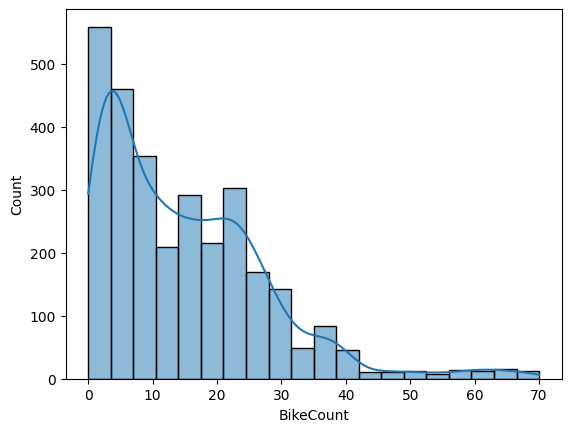

In [ ]:
###right skewness which means the outliers values more than upper limit (Q3)
sns.histplot(data=data,x='BikeCount',kde=True,bins=20)

Replace outliers in BikeCount. Lower limit: -20.5, Upper limit: 47.5


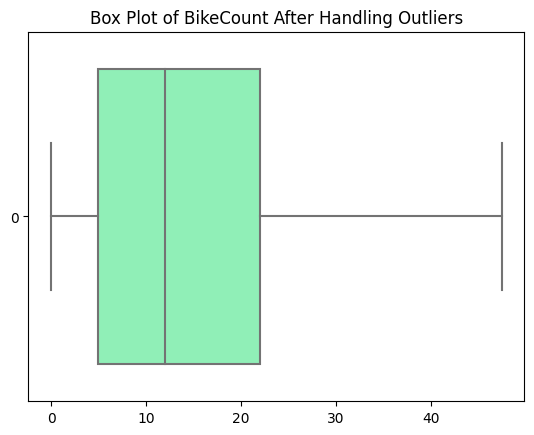

In [ ]:

# Handling outliers using z-score
from scipy import stats
def replace_outliers(col):
    Q1, Q3 = col.quantile(0.25), col.quantile(0.75)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    return lower_range, upper_range

# Specify the column you want to process
col_to_process = 'BikeCount'

# Replace outliers only for the specified column
if data[col_to_process].dtype != 'object':
    lower_limit, upper_limit = replace_outliers(data[col_to_process])

    # Replace outliers with the upper and lower limits
    data[col_to_process] = np.where(data[col_to_process] < lower_limit, lower_limit, data[col_to_process])
    data[col_to_process] = np.where(data[col_to_process] > upper_limit, upper_limit, data[col_to_process])

    print(f"Replace outliers in {col_to_process}. Lower limit: {lower_limit}, Upper limit: {upper_limit}")
    # After handling outliers
sns.boxplot(data=data['BikeCount'], palette='rainbow', orient='h')
plt.title('Box Plot of BikeCount After Handling Outliers')
plt.show()

#### LABEL ENCODING



In [ ]:
# show each category in traffic situation
data['Traffic Situation'].value_counts()

normal    1669
heavy      682
high       321
low        304
Name: Traffic Situation, dtype: int64

In [ ]:
#Converting target variable Traffic Situation into Numeric form
data['Traffic Situation'] = data['Traffic Situation'].replace({'low':0, 'normal':1, 'heavy':2, 'high':3})

In [ ]:

data['Day of the week'].value_counts()

Tuesday      480
Wednesday    480
Thursday     480
Saturday     384
Sunday       384
Monday       384
Friday       384
Name: Day of the week, dtype: int64

In [ ]:
#Converting Days of weak into Numeric form
data['Day of the week'] = data['Day of the week'].replace({'Saturday':1,'Sunday':2,'Monday':3,'Tuesday':4,'Wednesday':5,
                                                           'Thursday':6,'Friday':7})

In [ ]:
##test_temp = data.copy()

In [ ]:


data['hour'] = pd.to_datetime(data['Time']).dt.hour #Hour in separate column
data['minute'] = pd.to_datetime(data['Time']).dt.minute #Minute in separate column


# replace 0 with AM
# replace 1 with PM

data['Temp'] = data['Time'].apply(lambda x: x.split(' ')[1])
data['AM/PM'] = data['Temp'].replace({'AM':0,'PM':1})

In [ ]:
## to see the encoding done in specific columns
data.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,hour,minute,Temp,AM/PM
2448,12:00:00 PM,4,1,36,5.0,14,22,77,1,12,0,PM,1
2469,5:15:00 PM,4,1,113,26.0,26,8,173,2,17,15,PM,1
2468,5:00:00 PM,4,1,117,36.0,41,10,204,2,17,0,PM,1
2467,4:45:00 PM,4,1,133,17.0,22,8,180,2,16,45,PM,1
2466,4:30:00 PM,4,1,145,15.0,20,9,189,2,16,30,PM,1


In [ ]:
#Now remove 'Temp' and 'Time' columns
data= data.drop(columns = ['Time','Temp'], axis=1)
data

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,hour,minute,AM/PM
2448,4,1,36,5.0,14,22,77,1,12,0,1
2469,4,1,113,26.0,26,8,173,2,17,15,1
2468,4,1,117,36.0,41,10,204,2,17,0,1
2467,4,1,133,17.0,22,8,180,2,16,45,1
2466,4,1,145,15.0,20,9,189,2,16,30,1
...,...,...,...,...,...,...,...,...,...,...,...
327,13,7,171,47.5,27,3,260,2,9,45,0
328,13,7,131,43.0,20,3,197,2,10,0,0
329,13,7,177,47.5,12,4,249,2,10,15,0
1007,20,7,162,47.5,14,3,244,2,11,45,0


<Axes: >

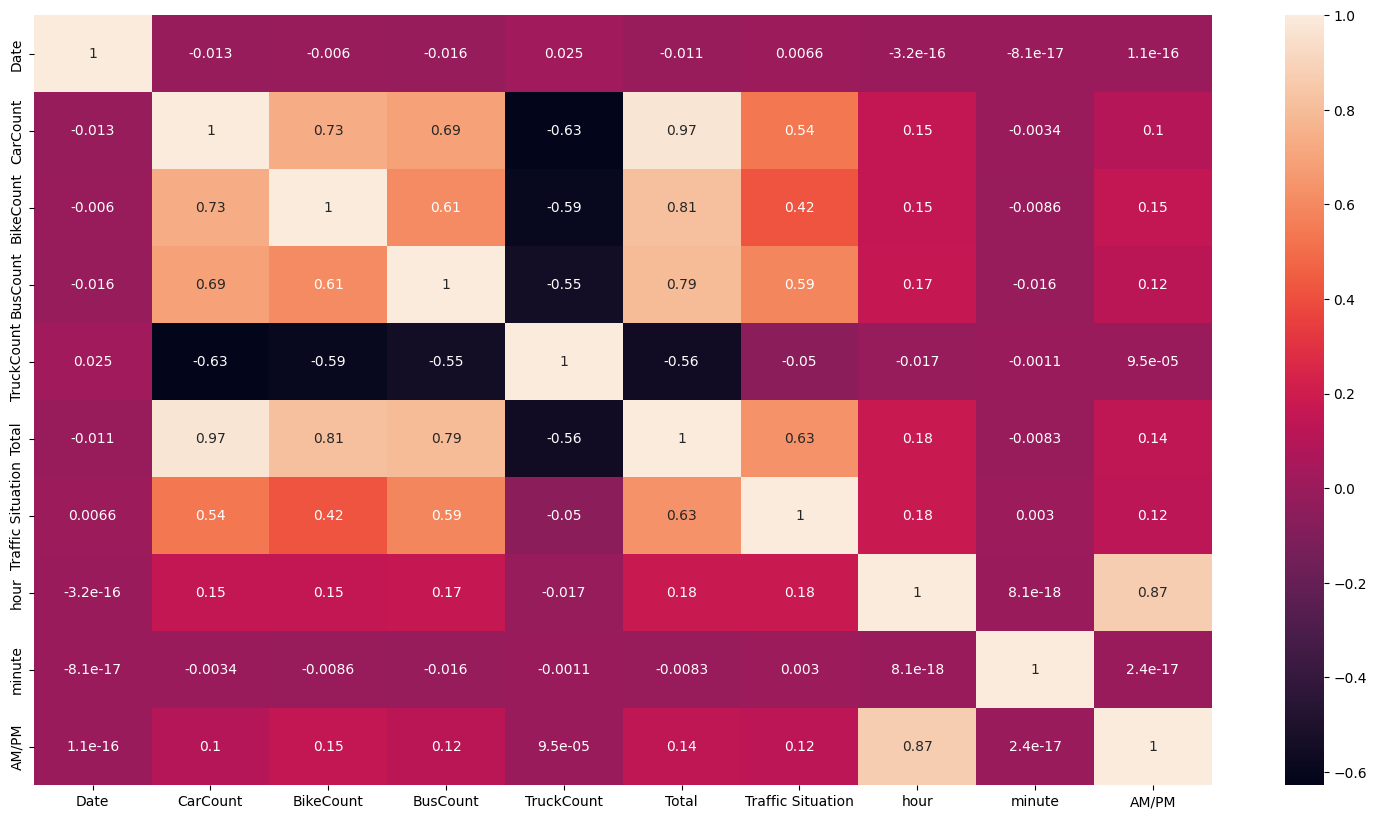

In [ ]:
###Visualizing Correlation between Features to feature extraction
plt.figure(figsize = (19,10))
sns.heatmap(data.corr(), annot = True)

In [ ]:
##columns with high Correlation and low Correlation will use for modeling (feature extraction)

Splitting Data


In [ ]:
data.columns

Index(['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation', 'hour', 'minute', 'AM/PM'],
      dtype='object')

In [ ]:
X= data[['Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total','hour', 'minute', 'AM/PM']]

y= data['Traffic Situation'].values

In [ ]:
#Splitting data into training and testing (Test size = 20%)
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.2 , random_state = 42,stratify=y) #to classify data equaly


Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

In [ ]:
#modeling lib
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:

# Create a k-nearest neighbors classifier
k = KNeighborsClassifier()

# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 8, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=k, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the data
grid_search.fit(train_X, train_y)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the final KNeighborsClassifier
best_k = KNeighborsClassifier(
    n_neighbors=best_params['n_neighbors'],
    weights=best_params['weights'],
    p=best_params['p']
)

# Fit the model with the best parameters on the training data
best_k.fit(train_X, train_y)

# Make predictions on the test set
k_pred = best_k.predict(test_X)

# Display classification report and confusion matrix
print("Classification Report:")
print(classification_report(test_y, k_pred))

print("Confusion Matrix:")
print(confusion_matrix(test_y, k_pred))

# Calculate accuracy
KNNAcc = accuracy_score(test_y, k_pred)
print('KNN accuracy: {:.2f}%'.format(KNNAcc * 100))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.70      0.75        61
           1       0.89      0.93      0.91       334
           2       0.89      0.96      0.92       137
           3       0.89      0.61      0.72        64

    accuracy                           0.88       596
   macro avg       0.87      0.80      0.83       596
weighted avg       0.88      0.88      0.87       596

Confusion Matrix:
[[ 43  18   0   0]
 [ 10 310  12   2]
 [  0   2 132   3]
 [  0  20   5  39]]
KNN accuracy: 87.92%


In [ ]:
# Create a Decision Tree classifier
tree_classifier = DecisionTreeClassifier(criterion='gini',max_depth=4, splitter='best')

# Train the classifier on the training data
tree_classifier.fit(train_X, train_y)

# Make predictions on the test data
tree_pred = tree_classifier.predict(test_X)

print(classification_report(test_y, tree_pred))
print(confusion_matrix(test_y, tree_pred))

DTCAcc = accuracy_score(tree_pred,test_y)
print('Decision Tree accuracy: {:.2f}%'.format(DTCAcc*100))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        61
           1       0.95      0.99      0.97       334
           2       1.00      1.00      1.00       137
           3       0.93      0.88      0.90        64

    accuracy                           0.96       596
   macro avg       0.97      0.93      0.95       596
weighted avg       0.97      0.96      0.96       596

[[ 52   9   0   0]
 [  0 330   0   4]
 [  0   0 137   0]
 [  0   8   0  56]]
Decision Tree accuracy: 96.48%


In [ ]:
#SVM model
SVCclassifier = SVC(kernel='rbf')
SVCclassifier.fit(train_X, train_y)

y_pred = SVCclassifier.predict(test_X)

print(classification_report(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))

SVCAcc = accuracy_score(y_pred,test_y)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        61
           1       0.94      0.94      0.94       334
           2       0.92      0.98      0.95       137
           3       0.84      0.80      0.82        64

    accuracy                           0.92       596
   macro avg       0.90      0.88      0.89       596
weighted avg       0.92      0.92      0.92       596

[[ 50  11   0   0]
 [  4 314   9   7]
 [  0   0 134   3]
 [  0  10   3  51]]
SVC accuracy: 92.11%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=4, n_estimators=50, n_jobs=-1 )
rfc = RandomForestClassifier()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [1,5,10,15,20],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the data
grid_search.fit(train_X, train_y)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the final RandomForestClassifier
best_rfc = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    n_jobs=-1
)

# Fit the model with the best parameters on the training data
best_rfc.fit(train_X, train_y)

# Make predictions on the test set
rfc_pred = best_rfc.predict(test_X)

# Display classification report and confusion matrix
print("Classification Report:")
print(classification_report(test_y, rfc_pred))

print("Confusion Matrix:")
print(confusion_matrix(test_y, rfc_pred))

# Calculate accuracy
RFCAcc = accuracy_score(test_y, rfc_pred)
print('Random Forest accuracy: {:.2f}%'.format(RFCAcc * 100))

Fitting 3 folds for each of 135 candidates, totalling 405 fits
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 20}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       0.97      0.99      0.98       334
           2       0.99      1.00      0.99       137
           3       0.96      0.84      0.90        64

    accuracy                           0.98       596
   macro avg       0.98      0.96      0.97       596
weighted avg       0.98      0.98      0.98       596

Confusion Matrix:
[[ 61   0   0   0]
 [  0 330   2   2]
 [  0   0 137   0]
 [  0  10   0  54]]
Random Forest accuracy: 97.65%


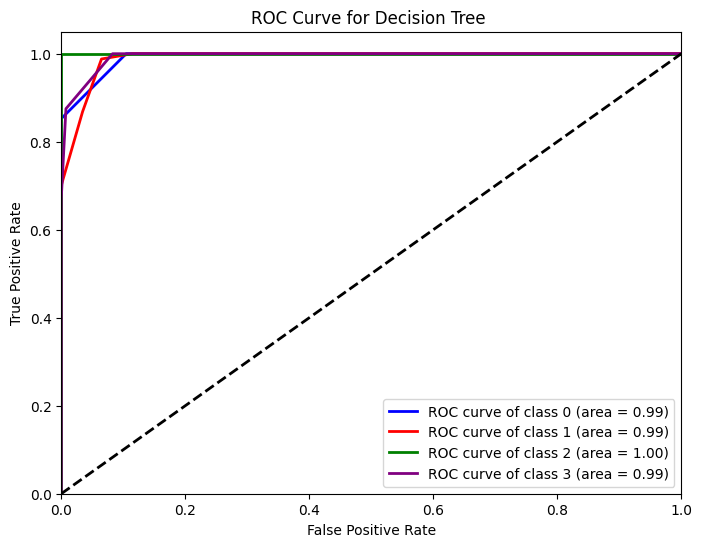

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Create a Decision Tree classifier
tree_classifier = DecisionTreeClassifier(criterion='gini', max_depth=4, splitter='best')

# Train the classifier on the training data
tree_classifier.fit(train_X, train_y)

# Get decision function values on the test data
tree_probs = tree_classifier.predict_proba(test_X)

# Binarize the true labels for multiclass ROC curve
test_y_bin = label_binarize(test_y, classes=[0, 1, 2, 3])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(tree_probs.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(test_y_bin[:, i], tree_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
colors = ['blue', 'red', 'green', 'purple']

plt.figure(figsize=(8, 6))
for i in range(tree_probs.shape[1]):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree ')
plt.legend(loc="lower right")
plt.show()


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}


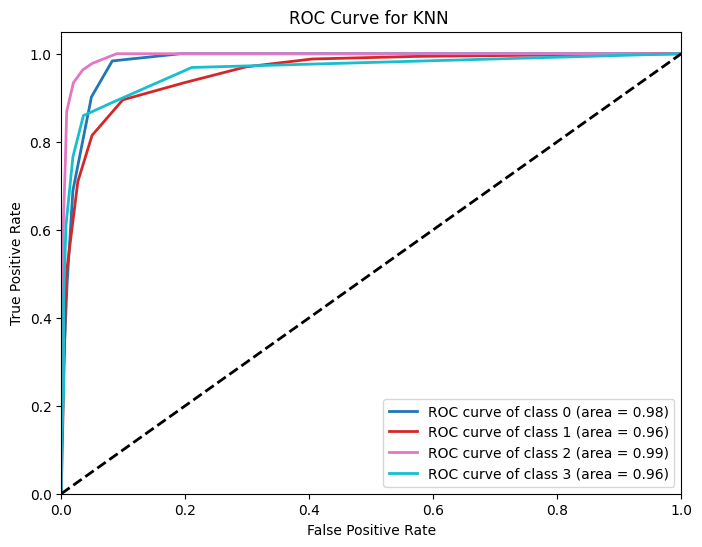

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Create a k-nearest neighbors classifier
k = KNeighborsClassifier()

# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 8, 10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=k, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the data
grid_search.fit(train_X, train_y)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the final KNeighborsClassifier
best_k = KNeighborsClassifier(
    n_neighbors=best_params['n_neighbors'],
    weights=best_params['weights'],
    p=best_params['p']
)

# Fit the model with the best parameters on the training data
best_k.fit(train_X, train_y)

# Get predicted probabilities
k_probs = best_k.predict_proba(test_X)

# Binarize the true labels for multiclass ROC curve
test_y_bin = label_binarize(test_y, classes=best_k.classes_)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(k_probs.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(test_y_bin[:, i], k_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
colors = plt.cm.get_cmap('tab10', k_probs.shape[1])

plt.figure(figsize=(8, 6))
for i in range(k_probs.shape[1]):
    plt.plot(fpr[i], tpr[i], color=colors(i), lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN ')
plt.legend(loc="lower right")
plt.show()


Fitting 3 folds for each of 135 candidates, totalling 405 fits
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 20}


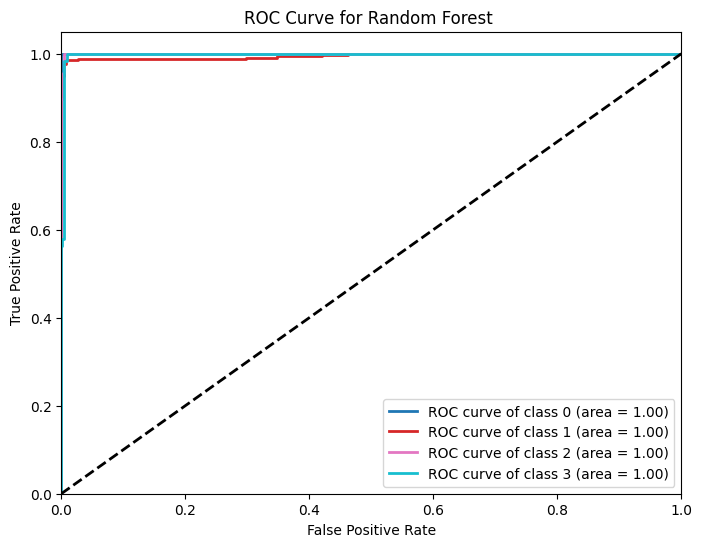

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Create a Random Forest classifier
rfc = RandomForestClassifier()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [1, 5, 10, 15, 20],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the data
grid_search.fit(train_X, train_y)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to create the final RandomForestClassifier
best_rfc = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    n_jobs=-1
)

# Fit the model with the best parameters on the training data
best_rfc.fit(train_X, train_y)

# Get predicted probabilities
rfc_probs = best_rfc.predict_proba(test_X)

# Binarize the true labels for multiclass ROC curve
test_y_bin = label_binarize(test_y, classes=best_rfc.classes_)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(rfc_probs.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(test_y_bin[:, i], rfc_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
colors = plt.cm.get_cmap('tab10', rfc_probs.shape[1])

plt.figure(figsize=(8, 6))
for i in range(rfc_probs.shape[1]):
    plt.plot(fpr[i], tpr[i], color=colors(i), lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest ')
plt.legend(loc="lower right")
plt.show()




#conclusion


###After analysing and putting different models to the test on our dataset :

-K-Nearest Neighbours (KNN): With an accuracy of 87.92%, this model is really accurate. In terms of precision, recall, and F1-score, it is well-rounded; but, as the confusion matrix shows, there is possibility of improvement, especially in the classification of class 0.

-Support Vector Classifier (SVC): 96.48% accuracy is a better result. It shows low misclassifications and constantly shows strong precision, recall, and F1-score in all classes.

-Decision Tree: Accuracy of 96.48% is similar to SVC. but exceeds it in a variety of classes in terms of F1-score, recall, and precision. However, it might struggle with more complex data patterns compared to SVC.

-Random Forest Classifier (RFC): 97.15% accuracy and best performance. It shows high precision, recall, and F1-score, with very few misclassifications.

In conclusion, all four models – KNN, SVC, Decision Tree, and RFC – have shown good performance.

The Random Forest Classifier is the most accurate model overall, with 97.15% accuracy, providing a balanced performance across various metrics. It’s particularly effective due to its ensemble approach, combining predictions from multiple decision trees, which enhances its capability to handle complex datasets.

That is why we suggest the Random Forest Classifier as the most suitable model for our dataset based on our analysis and testing. Because of its precision and durability, it's a great option for getting accurate and complex insights.

In [ ]:
compare = pd.DataFrame({'Model': ['kneighrestneighbor',
                                  'SVM', 'Decision Tree','Random Forest' ],
                        'Accuracy': [KNNAcc*100, SVCAcc*100,
                                    DTCAcc*100, RFCAcc*100 ]})
compare.sort_values(by='Accuracy',ascending = True)

,Model,Accuracy
0,kneighrestneighbor,87.919463
1,SVM,92.114094
2,Decision Tree,96.476510
3,Random Forest,97.651007
